In [15]:
import pandas as pd
from tqdm import tqdm
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file = "../data/SSCURVES(1-61).xlsx"

In [12]:
def sigmoid(x, A, h, slope, C):
    """https://stackoverflow.com/a/55104465
    Args:
        A + C: the maximum value of the curve.
        h: the x-value of the curve's midpoint.
        slope: the logistic growth rate or steepness of the curve.
    """
    return 1 / (1 + np.exp ((x - h) / slope)) *  A + C

100%|███████████████████████████████████████████████████████████████| 63/63 [00:17<00:00,  3.69it/s]


    index          A         h     slope          C
0       1 -10.259356  1.288687  0.042000  10.107972
1       2  -5.270983  1.332257  0.030224   5.237221
2       3  -5.439427  1.424478  0.027023   5.442393
3       4  -1.468045  1.344161  0.023980   1.470685
4       5 -11.340445  1.255731  0.046278  11.212297
..    ...        ...       ...       ...        ...
58     59  -3.393839  1.265876  0.051135   3.350865
59     60  -4.024771  1.274402  0.067848   3.899659
60     61  -2.647355  1.277645  0.058769   2.592959
61     62  -3.225658  1.443565  0.037356   3.226607
62    555 -11.193105  1.354132  0.038841  11.187029

[63 rows x 5 columns]


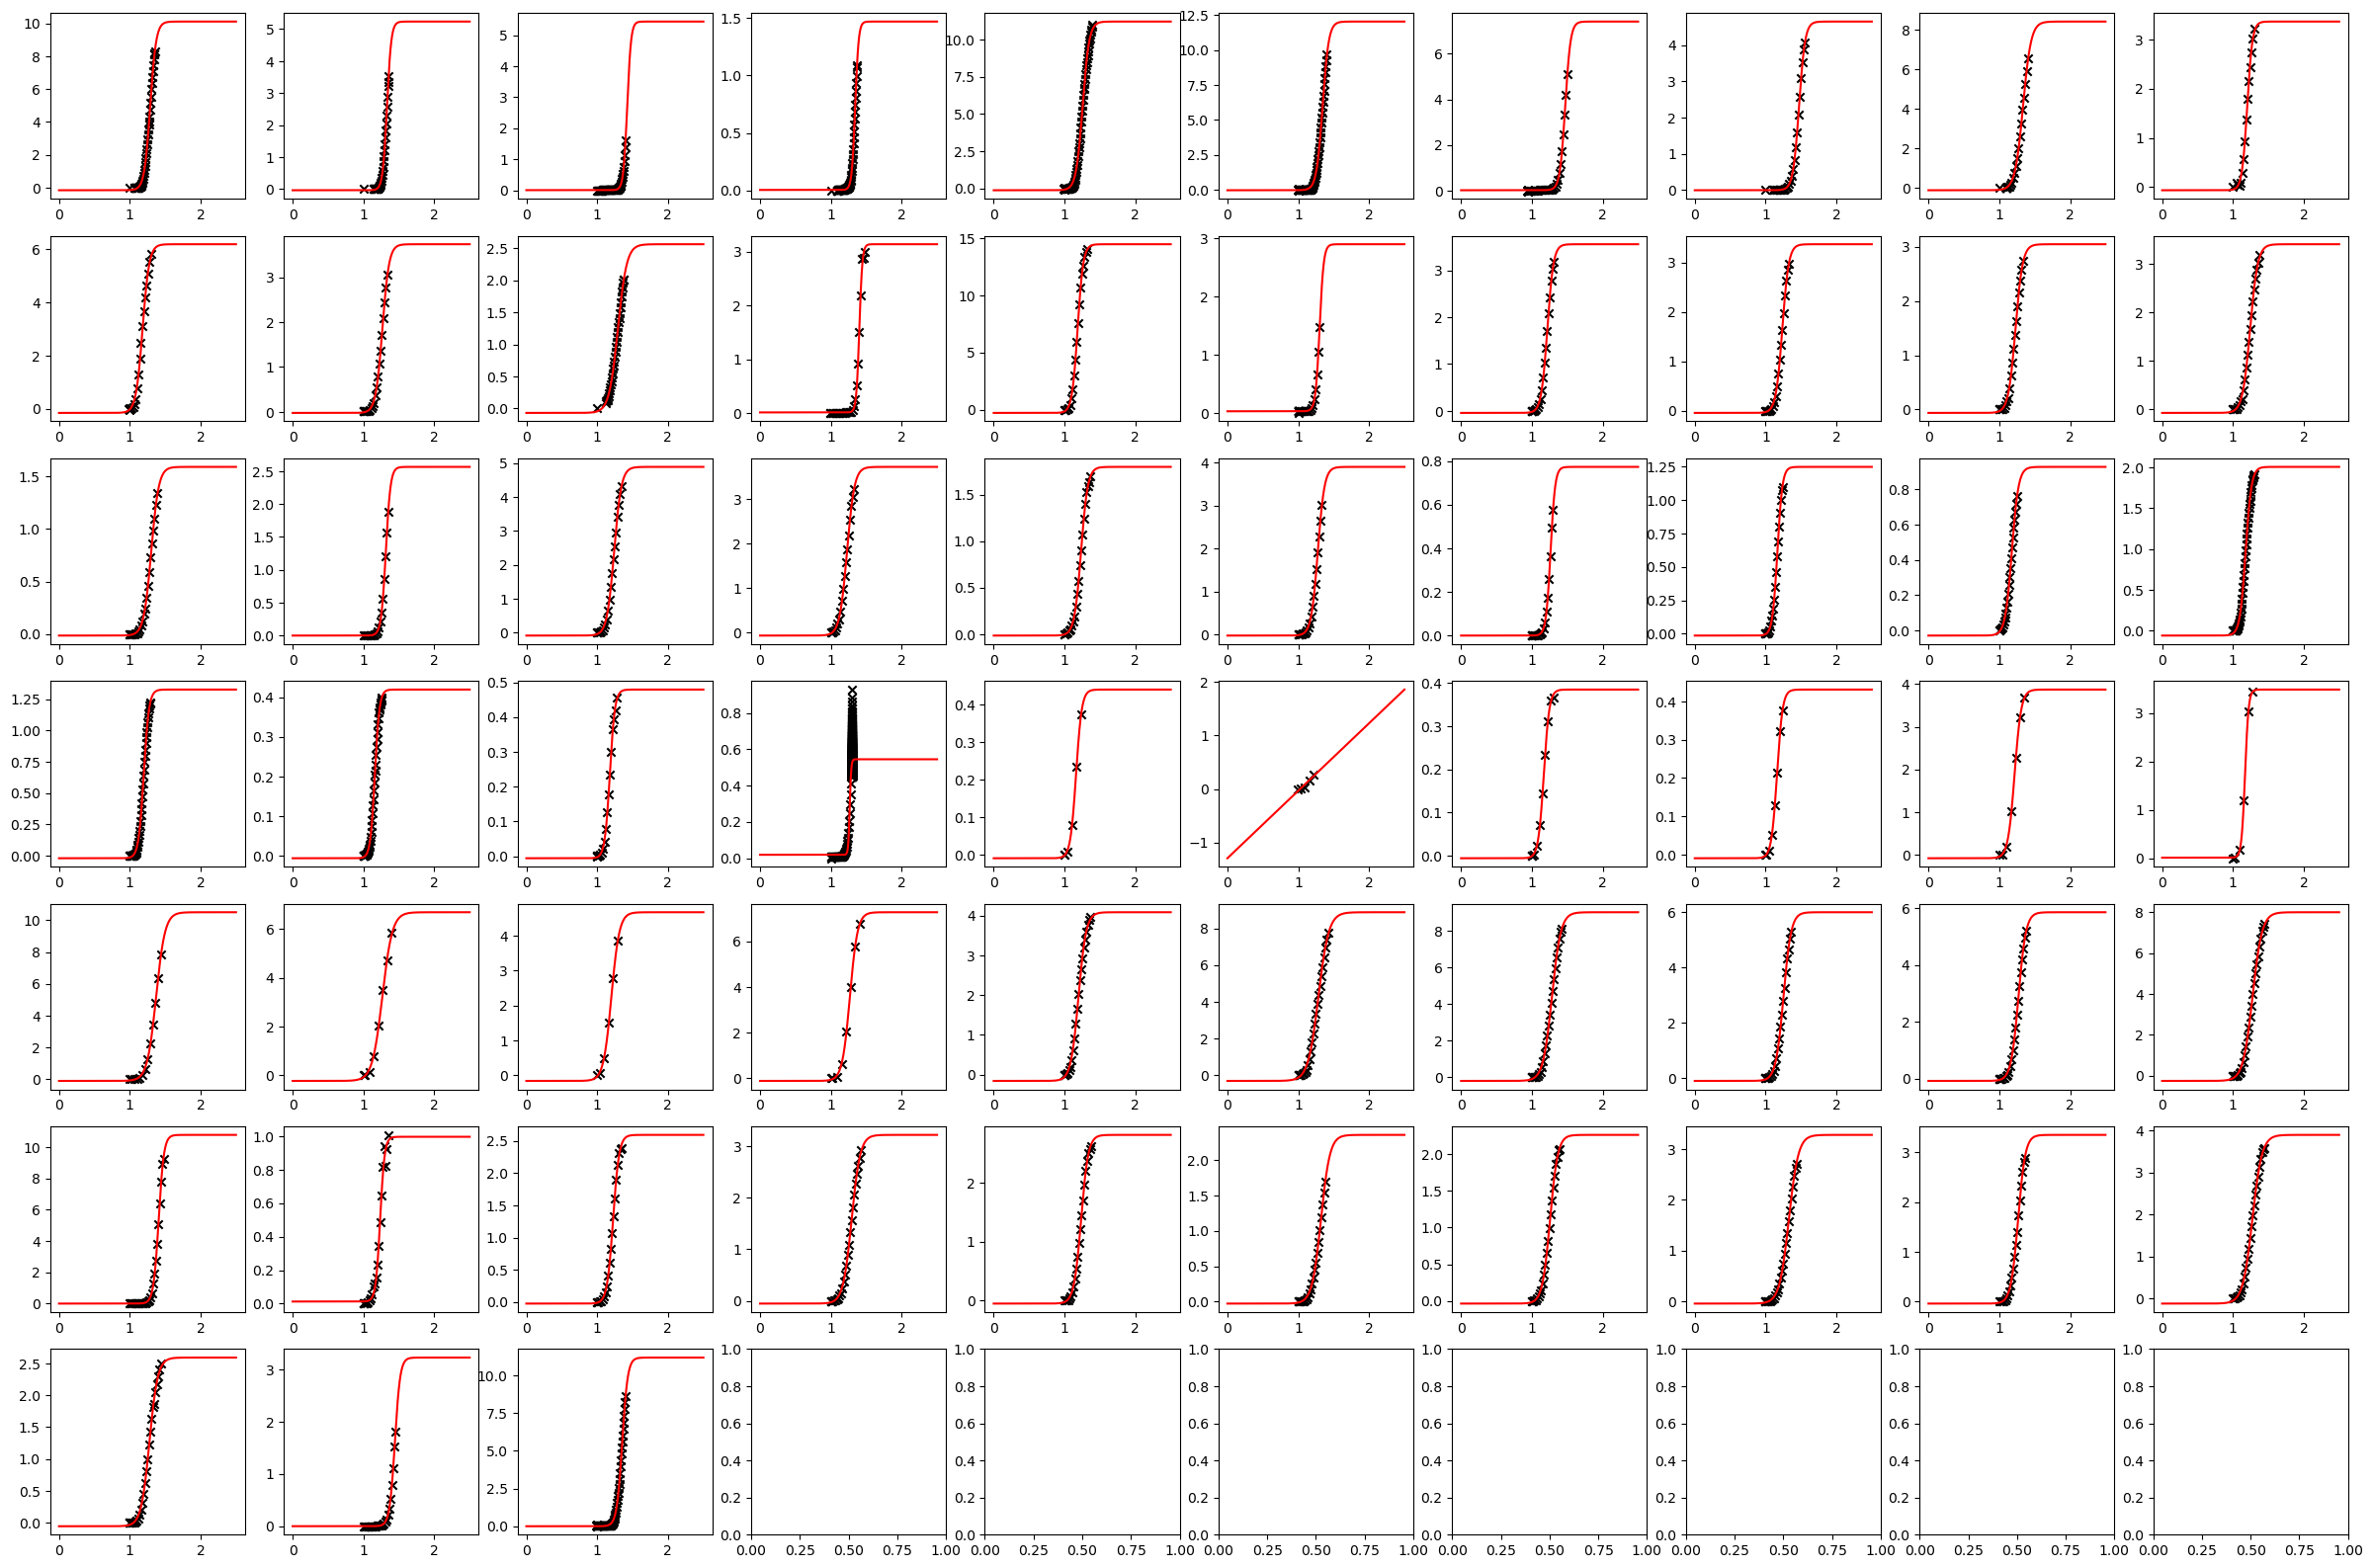

In [29]:
xls = pd.ExcelFile(file)

index_list =  []
A_list = []
h_list = []
slope_list = []
C_list = []

fig, axs = plt.subplots(7, 10, figsize=(30,20))
x = np.linspace(0, 2.5, 1000)


for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=len(xls.sheet_names), ncols=100):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']

    popt, _ = curve_fit(sigmoid, x_data, y_data, maxfev=10000)#bounds=((0, -np.inf,-np.inf,0),(np.inf, np.inf, np.inf,np.inf)), maxfev=10000)
    index_list.append(int(sheet))
    A_list.append(popt[0])
    h_list.append(popt[1])
    slope_list.append(popt[2])
    C_list.append(popt[3])

    ax.scatter(x_data, y_data, marker='x', color='black')
    ax.plot(x, sigmoid(x, *popt), 'r-')


data = {
    "index": index_list,
    "A": A_list,
    "h": h_list,
    "slope": slope_list,
    "C": C_list,
}

df = pd.DataFrame.from_dict(data)
print(df)

plt.show()


In [9]:
df.to_csv("sigmoid_labels.csv", index=False) # We have our own indices.

array([[<AxesSubplot: title={'center': 'C'}>]], dtype=object)

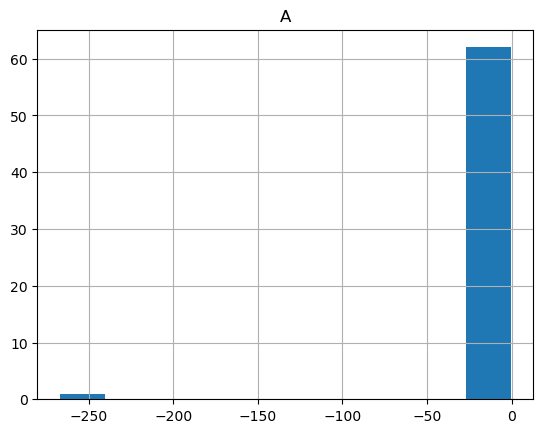

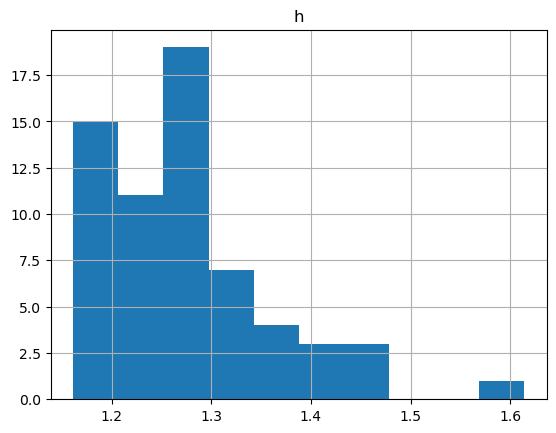

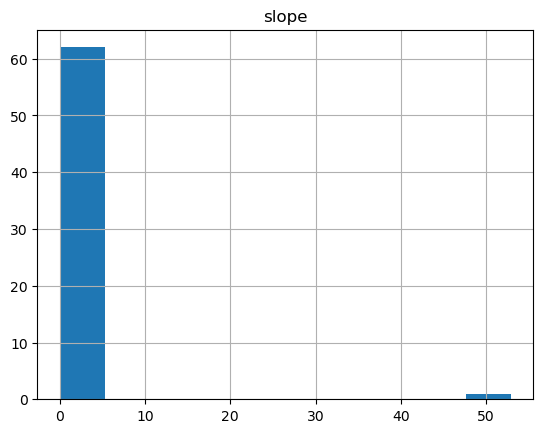

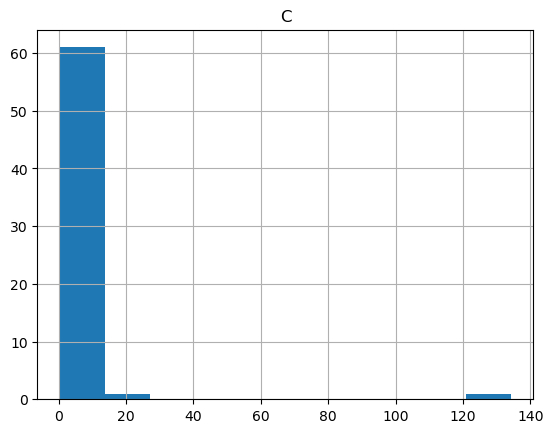

In [21]:
df.hist(column='A')
df.hist(column='h')
df.hist(column='slope')
df.hist(column='C')